<a href="https://colab.research.google.com/github/aileendugan/bone-xray-cnn/blob/main/cnn-synthetic-data-addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Synthetic Data added to CNN training
# ________________________________________________________________________________
# Aileen Dugan, May 2023
#
# CNN with MURA dataset
# ________________________________________________________________________________
# Aileen Dugan, December 2022
#
# The google drive MURA folder can be found here(available to all University of Notre Dame):
# https://drive.google.com/drive/u/1/folders/1oi4cwqoqcoI22BcLPptZf0ZoBgLWt-vK

# Based on Keras documentation available at https://keras.io/examples/vision/mnist_convnet/
# more keras pages used:
# https://keras.io/examples/vision/image_classification_from_scratch/
# https://keras.io/api/data_loading/image/
# https://keras.io/getting_started/intro_to_keras_for_engineers/

# tenserflow pages used:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset

# stackoverflow pages used
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# https://stackoverflow.com/questions/71897814/adding-images-to-an-array-that-gives-back-number-of-images-and-dimension-of-imag

# NumPy documentation used:
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

# Matplotlib documentation used: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py

# pandas documentation used:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows
#
# kaggle pages used:
# https://www.kaggle.com/code/hrmello/flow-from-dataframe-a-memory-friendly-approach/notebook
# densenet inspiration at https://www.kaggle.com/code/taoofdata/mura-keras-basic-training-loop

# On categorical data: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# MNIST example at https://colab.research.google.com/drive/1lHzEByuyOZ3fs1q4GKRd6GdzuMHYr_Tg?authuser=1#scrollTo=kc4tyAKWm59Q

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from pathlib import Path
import pandas as pd
import os

#print folder name
print(os.listdir("/content/drive/MyDrive/MURA"))

['MURA-v1.1']


In [ ]:
dataset_root = Path('/content/drive/MyDrive/MURA/MURA-v1.1')

In [ ]:
list(dataset_root.iterdir())

[PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/train_labeled_studies.csv'),
 PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/train_image_paths.csv'),
 PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/valid_labeled_studies.csv'),
 PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/valid_image_paths.csv'),
 PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/valid'),
 PosixPath('/content/drive/MyDrive/MURA/MURA-v1.1/train')]

In [ ]:
#df is the generated dataframe whose head can be visualized below
df = pd.read_csv('/content/drive/MyDrive/MURA/MURA-v1.1/train_image_paths.csv', header=None, names=['filename'])
df.head()

,filename
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [ ]:
#Adding class column to the dataframe with positive or negative label
#Classification is done on basis of the image names (postive/negative)
df['class'] = (df.filename
               .str.extract('study.*_(positive|negative)'))
df['BodyPart'] = (df.filename
               .str.extract('XR_(SHOULDER|ELBOW|FINGER|FOREARM|HAND|HUMERUS|WRIST)'))
df.head()

,filename,class,BodyPart
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,SHOULDER
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,SHOULDER
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,SHOULDER
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,SHOULDER
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,SHOULDER


In [ ]:
df_onlyFinger = df[(df["BodyPart"]=="FINGER")]
df_onlyFinger.head()

,filename,class,BodyPart
9651,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive,FINGER
9652,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive,FINGER
9653,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive,FINGER
9654,MURA-v1.1/train/XR_FINGER/patient03228/study1_...,positive,FINGER
9655,MURA-v1.1/train/XR_FINGER/patient03228/study1_...,positive,FINGER


In [ ]:
df_simpleFinger = df_onlyFinger[["filename","class"]]
df_simpleFinger.head()

,filename,class
9651,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive
9652,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive
9653,MURA-v1.1/train/XR_FINGER/patient03227/study1_...,positive
9654,MURA-v1.1/train/XR_FINGER/patient03228/study1_...,positive
9655,MURA-v1.1/train/XR_FINGER/patient03228/study1_...,positive


In [ ]:
#A function to generate the dataframe for a csv file
def generate_df(dataset_root, csv_name, BODYPART):
    df = pd.read_csv(dataset_root/csv_name, header=None, names=['filename'])
    df['class'] = (df.filename
               .str.extract('study.*_(positive|negative)'))
    df['BodyPart'] = (df.filename
               .str.extract('XR_(SHOULDER|ELBOW|FINGER|FOREARM|HAND|HUMERUS|WRIST)'))
    bodypart = df[(df["BodyPart"]==BODYPART)]
    df_onlyOne = bodypart[["filename","class"]]
    return df_onlyOne

In [ ]:
df_train = generate_df(dataset_root, 'train_image_paths.csv',"SHOULDER")
df_train.head()

,filename,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive


In [ ]:
df_valid = generate_df(dataset_root, 'valid_image_paths.csv',"SHOULDER")
df_valid.head()

,filename,class
1708,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,positive
1709,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,positive
1710,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,positive
1711,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,positive
1712,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,positive


**NEW FOR SYNTHETIC DATA ADDITION**: cleaning up and adding in the synthetic data to the training data

1. Negative Synthetic grid of images cropped, sharpened, and resaved as individual images in data/Augmented_Fakes/negative/SHOULDER

In [ ]:
from PIL import Image, ImageEnhance
synthetic_train_negative = Image.open('/content/drive/MyDrive/data/experiments/negative/SHOULDER/00009-SHOULDER-auto1-resumecustom/fakes001200.png')
synthetic_train_positive = Image.open('/content/drive/MyDrive/data/experiments/positive/SHOULDER/00000-SHOULDER-auto1/fakes001680.png')
#cropping, sharpening, and saving each image in the NEGATIVE SHOULDER synthetic data images grid as new own .png image in new folder labeled "Augmented_Fakes"
print(synthetic_train_negative.size) #30 pics across and 16 pics down = 480 pics total each pic is size (256,256)
left = 0
top = 0
right = 256
bottom = 256
img_num_neg = 0
while bottom <= 4096:
  #print("at top of bottom while loop before right while loop")
  while right <= 7680:
    #print(f"new fake image in right while loop number {img_num_neg}")
    #crop to size of one image in the grid - each image is 256x256 - will be resized to 224 later with rest of dataframe train images
    new_img = synthetic_train_negative.crop((left,top,right,bottom))
    #sharpen new cropped image
    enhancer = ImageEnhance.Sharpness(new_img)
    factor = 2
    new_final_img = enhancer.enhance(factor)
    image_name = 'image'+ str(img_num_neg) + '.png'
    new_img_path = os.path.join('/content/drive/MyDrive/data/Augmented_Fakes/negative/SHOULDER/', image_name)
    new_final_img.save(new_img_path, 'PNG', quality=90)
    left = left + 256
    right = right + 256
    img_num_neg = img_num_neg + 1
  left = 0
  top = top + 256
  right = 256
  bottom = bottom + 256
  #print(f"at bottom of bottom while loop new dimensions for crop are: left = {left} top = {top} right = {right} bottom = {bottom}")


(7680, 4096)


KeyboardInterrupt: ignored

2. Positive synthetic grid images cropped, sharpened, and resaved as individual images in data/Augmented_Fakes/positive/SHOULDER folder

In [ ]:
#cropping, sharpening, and saving each image in the POSITIVE SHOULDER synthetic data images grid as new own .png image in new folder labeled "Augmented_Fakes"
print(synthetic_train_positive.size) #30 pics across and 16 pics down = 480 pics total each pic is size (256,256)
left_pos = 0
top_pos = 0
right_pos = 256
bottom_pos = 256
img_num_pos = 0
while bottom_pos <= 4096:
  print("at top of bottom while loop before right while loop")
  while right_pos <= 7680:
    print(f"new fake image in right while loop number {img_num_pos}")
    #crop to size of one image in the grid - each image is 256x256 - will be resized to 224 later with rest of dataframe train images
    new_img_pos = synthetic_train_positive.crop((left_pos,top_pos,right_pos,bottom_pos))
    #sharpen new cropped image
    enhancer_pos = ImageEnhance.Sharpness(new_img_pos)
    factor_pos = 2
    new_final_img_pos = enhancer_pos.enhance(factor_pos)
    image_name_pos = 'image'+ str(img_num_pos) + '.png'
    new_img_path_pos = os.path.join('/content/drive/MyDrive/data/Augmented_Fakes/positive/SHOULDER/', image_name_pos)
    new_final_img_pos.save(new_img_path_pos, 'PNG', quality=90)
    left_pos = left_pos + 256
    right_pos = right_pos + 256
    img_num_pos = img_num_pos + 1
  left_pos = 0
  top_pos = top_pos + 256
  right_pos = 256
  bottom_pos = bottom_pos + 256
  print(f"at bottom of bottom while loop new dimensions for crop are: left = {left_pos} top = {top_pos} right = {right_pos} bottom = {bottom_pos}")


(7680, 4096)
at top of bottom while loop before right while loop
new fake image in right while loop number 0
new fake image in right while loop number 1
new fake image in right while loop number 2
new fake image in right while loop number 3
new fake image in right while loop number 4
new fake image in right while loop number 5
new fake image in right while loop number 6
new fake image in right while loop number 7
new fake image in right while loop number 8
new fake image in right while loop number 9
new fake image in right while loop number 10
new fake image in right while loop number 11
new fake image in right while loop number 12
new fake image in right while loop number 13
new fake image in right while loop number 14
new fake image in right while loop number 15
new fake image in right while loop number 16
new fake image in right while loop number 17
new fake image in right while loop number 18
new fake image in right while loop number 19
new fake image in right while loop number 20


ADD NEW SYNTHETIC IMAGES TO DATAFRAME WITH CORRECT CLASS LABELS (TO DF_TRAIN)

Add negative SHOULDER synthetic images to training dataframe

In [ ]:
synthetic_neg_path = '/content/drive/MyDrive/data/Augmented_Fakes/negative/SHOULDER/'
image_count_neg = 0
while image_count_neg <= 479:
  neg_img_name = 'image'+ str(image_count_neg)+ '.png'
  filename_neg_path = os.path.join(synthetic_neg_path, neg_img_name)
  df_train.loc[len(df_train.index)] = [filename_neg_path, 'negative']
  image_count_neg = image_count_neg + 1
df_train.tail()

,filename,class
8854,/content/drive/MyDrive/data/Augmented_Fakes/ne...,negative
8855,/content/drive/MyDrive/data/Augmented_Fakes/ne...,negative
8856,/content/drive/MyDrive/data/Augmented_Fakes/ne...,negative
8857,/content/drive/MyDrive/data/Augmented_Fakes/ne...,negative
8858,/content/drive/MyDrive/data/Augmented_Fakes/ne...,negative


Add positive SHOULDER synthetic images to training dataframe

In [ ]:
synthetic_pos_path = '/content/drive/MyDrive/data/Augmented_Fakes/positive/SHOULDER/'
image_count_pos = 0
while image_count_pos <= 479:
  pos_img_name = 'image'+ str(image_count_pos)+ '.png'
  filename_pos_path = os.path.join(synthetic_pos_path, pos_img_name)
  df_train.loc[len(df_train.index)] = [filename_pos_path, 'positive']
  image_count_pos = image_count_pos + 1
df_train.tail()

,filename,class
9334,/content/drive/MyDrive/data/Augmented_Fakes/po...,positive
9335,/content/drive/MyDrive/data/Augmented_Fakes/po...,positive
9336,/content/drive/MyDrive/data/Augmented_Fakes/po...,positive
9337,/content/drive/MyDrive/data/Augmented_Fakes/po...,positive
9338,/content/drive/MyDrive/data/Augmented_Fakes/po...,positive


In [ ]:
img_path = '/content/drive/MyDrive/MURA/'

following code block was edited from original version last semester to include the new synthetic images in the dataframe with different image paths for the x_train y_train data.

In [ ]:
#take dataframe and make ndarray items for training and testing - fit to densenet keep 3 channels with style from MNIST example instead of generators
import re
x_train = []
y_train = []
for index,row in df_train.iterrows():
  if re.search(".+/Augmented_Fakes/.+",row["filename"]):
    input_arr = cv2.imread(row["filename"])
    #files_curr_name = row["filename"]
    #print(f"regex found so is new synthetic data from dataframe with path {files_curr_name}")
  else:
    input_arr = cv2.imread(os.path.join(img_path,row["filename"]))
    #files_curr_name = row["filename"]
    #print(f"regex was not found so is original data from dataframe with path {files_curr_name}")
  #, cv2.IMREAD_GRAYSCALE)
  input_arr = cv2.resize(input_arr, (224,224))
  label = row["class"]
  x_train.append(input_arr)
  y_train.append(label)
x_train = np.stack(x_train, axis=0)
y_train = np.array(y_train)

In [ ]:
x_test = []
y_test = []
for index,row in df_valid.iterrows():
  input_arr = cv2.imread(os.path.join(img_path,row["filename"]))
  #, cv2.IMREAD_GRAYSCALE)
  input_arr = cv2.resize(input_arr, (224,224))
  label = row["class"]
  x_test.append(input_arr)
  y_test.append(label)
x_test = np.stack(x_test, axis=0)
y_test = np.array(y_test)

positive


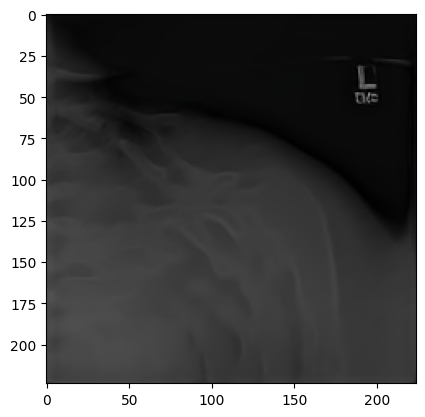

In [ ]:
# Let's show one example from the dataset
image_index = 9000 # you may select anything from 0 to 9338 (we have 8379 + 480 + 480 = 9338 training samples for shoulder xrays)
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

# Step 2: Reshaping to 224 x 224 tensors and normalizing pixel intensities to the [0,1] range

for option 1:manual filter picking non densenet169 replace 3s with 1s in code block below

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 224, 224, 3)
x_test = x_test.reshape(x_test.shape[0], 224, 224, 3)
input_shape = (224, 224, 3)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the 8-bit grayscale intensities by dividing them by the max intensity value
x_train /= 255
x_test /= 255

# Step 3: Building the convolutional neural network with densenet169 (recommended by MURA dataset users)

Option 1: manually add relu convolutions, flatten,and add dense layers to sequential model

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
# *** we need to import implementations of a few extra layers:
from tensorflow.keras import optimizers

# Creating a Sequential Model and adding the layers
model = Sequential()

# *** Now we need to add a few layers. We will use model.add() function:
model.add(Conv2D(filters=16, kernel_size =(5,5), input_shape = input_shape, activation = 'relu'))
model.add(Conv2D(filters=16, kernel_size =(5,5), input_shape = input_shape, activation = 'relu'))
#model.add(Conv2D(filters=16, kernel_size =(5,5), input_shape = input_shape, activation = 'relu'))
#model.add(Conv2D(filters=16, kernel_size =(3,3), input_shape = input_shape, activation = 'relu'))
#model.add(Conv2D(filters=16, kernel_size =(3,3), input_shape = input_shape, activation = 'relu'))
model.add(Flatten())
#model.add(Dense(units=7,activation='softmax'))
#model.add(Dense(units=128,activation='softmax'))
model.add(Dense(units=100,activation='softmax'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 16)      6416      
                                                                 
 flatten (Flatten)           (None, 746496)            0         
                                                                 
 dense (Dense)               (None, 100)               74649700  
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 74,657,542
Trainable params: 74,657,542
Non-trainable params: 0
_________________________________________________________________


option 2: Densenet169 (eliminates vanishing gradiant problem) with sequential model with one sigmoid dense layer. convolutional layers include batch normal and relu

In [ ]:
#Downloading the densenet model pretrained on the imagenet dataset
densenet = tf.keras.applications.DenseNet169(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

51877672/51877672 [==============================] - 4s 0us/step


In [ ]:
#Freezing the weights of the pretrained model
densenet.trainable = False

In [ ]:
densenet.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
#Adding the Flatten layer and the sigmoid classification layer to the pretrained densenet model (recommended)
model = tf.keras.models.Sequential([
    densenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 1)                 81537     
                                                                 
Total params: 12,724,417
Trainable params: 81,537
Non-trainable params: 12,642,880
_________________________________________________________________


# Step 4: Training

following option 2: Densenet169 - compile and training

In [ ]:
#Compiling the model using adam optimizer
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

following 3 blocks prepares y data labels to correlate to 0 and 1 for negative and positive (use for both options 1 and 2)

In [ ]:
from sklearn import preprocessing
# prepare labels so that positive and negative map to 0 and 1
def prepare_targets(y_train, y_test):
 le = preprocessing.LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
def decode_targets(y_train, prep_label):
 le = preprocessing.LabelEncoder()
 le.fit(y_train)
 label = le.inverse_transform(prep_label)
 #y_test_enc = le.transform(y_test)
 return label

In [ ]:
y_train_enc,y_test_enc = prepare_targets(y_train,y_test)

use code block below for option 1

In [ ]:
epochs = 3  # how many times the network will see the ENTIRE training set

sgd = optimizers.SGD(learning_rate = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('-TRAINING----------------------------')
print('Input shape:', x_train.shape)
print('Number of training images: ', x_train.shape[0])

model.fit(x=x_train, y=y_train_enc, epochs=epochs)

-TRAINING----------------------------
Input shape: (8379, 224, 224, 1)
Number of training images:  8379
Epoch 1/3
262/262 [==============================] - 1201s 5s/step - loss: 0.7393 - accuracy: 0.4966
Epoch 2/3
262/262 [==============================] - 1209s 5s/step - loss: 0.7002 - accuracy: 0.4968
Epoch 3/3
262/262 [==============================] - 1198s 5s/step - loss: 0.6990 - accuracy: 0.5014


use code block below for option 2: densenet169

In [ ]:
epochs = 5
print('-TRAINING----------------------------')
print('Input shape:', x_train.shape)
print('Number of training images: ', x_train.shape[0])

model.fit(x=x_train, y=y_train_enc, epochs=epochs)

-TRAINING----------------------------
Input shape: (9339, 224, 224, 3)
Number of training images:  9339
Epoch 1/5
292/292 [==============================] - 471s 2s/step - loss: 1.1942 - accuracy: 0.6553
Epoch 2/5
292/292 [==============================] - 463s 2s/step - loss: 0.6656 - accuracy: 0.7756
Epoch 3/5
292/292 [==============================] - 462s 2s/step - loss: 0.6360 - accuracy: 0.7911
Epoch 4/5
292/292 [==============================] - 468s 2s/step - loss: 0.4749 - accuracy: 0.8396
Epoch 5/5
292/292 [==============================] - 460s 2s/step - loss: 0.3170 - accuracy: 0.8804


# Step 5: Let's see what the network learned: evaluate it on test (unseen) data

remove 4th value "3" on line 14 and 3rd value "3" on line 20 in code block below for option 1. keep same for option 2:Densenet169

-TESTING-----------------------------
Number of test images: 563
18/18 [==============================] - 30s 2s/step - loss: 1.4751 - accuracy: 0.6412
Test loss: 1.4751086235046387
Test accuracy: 0.6412078142166138
1/1 [==============================] - 0s 130ms/step


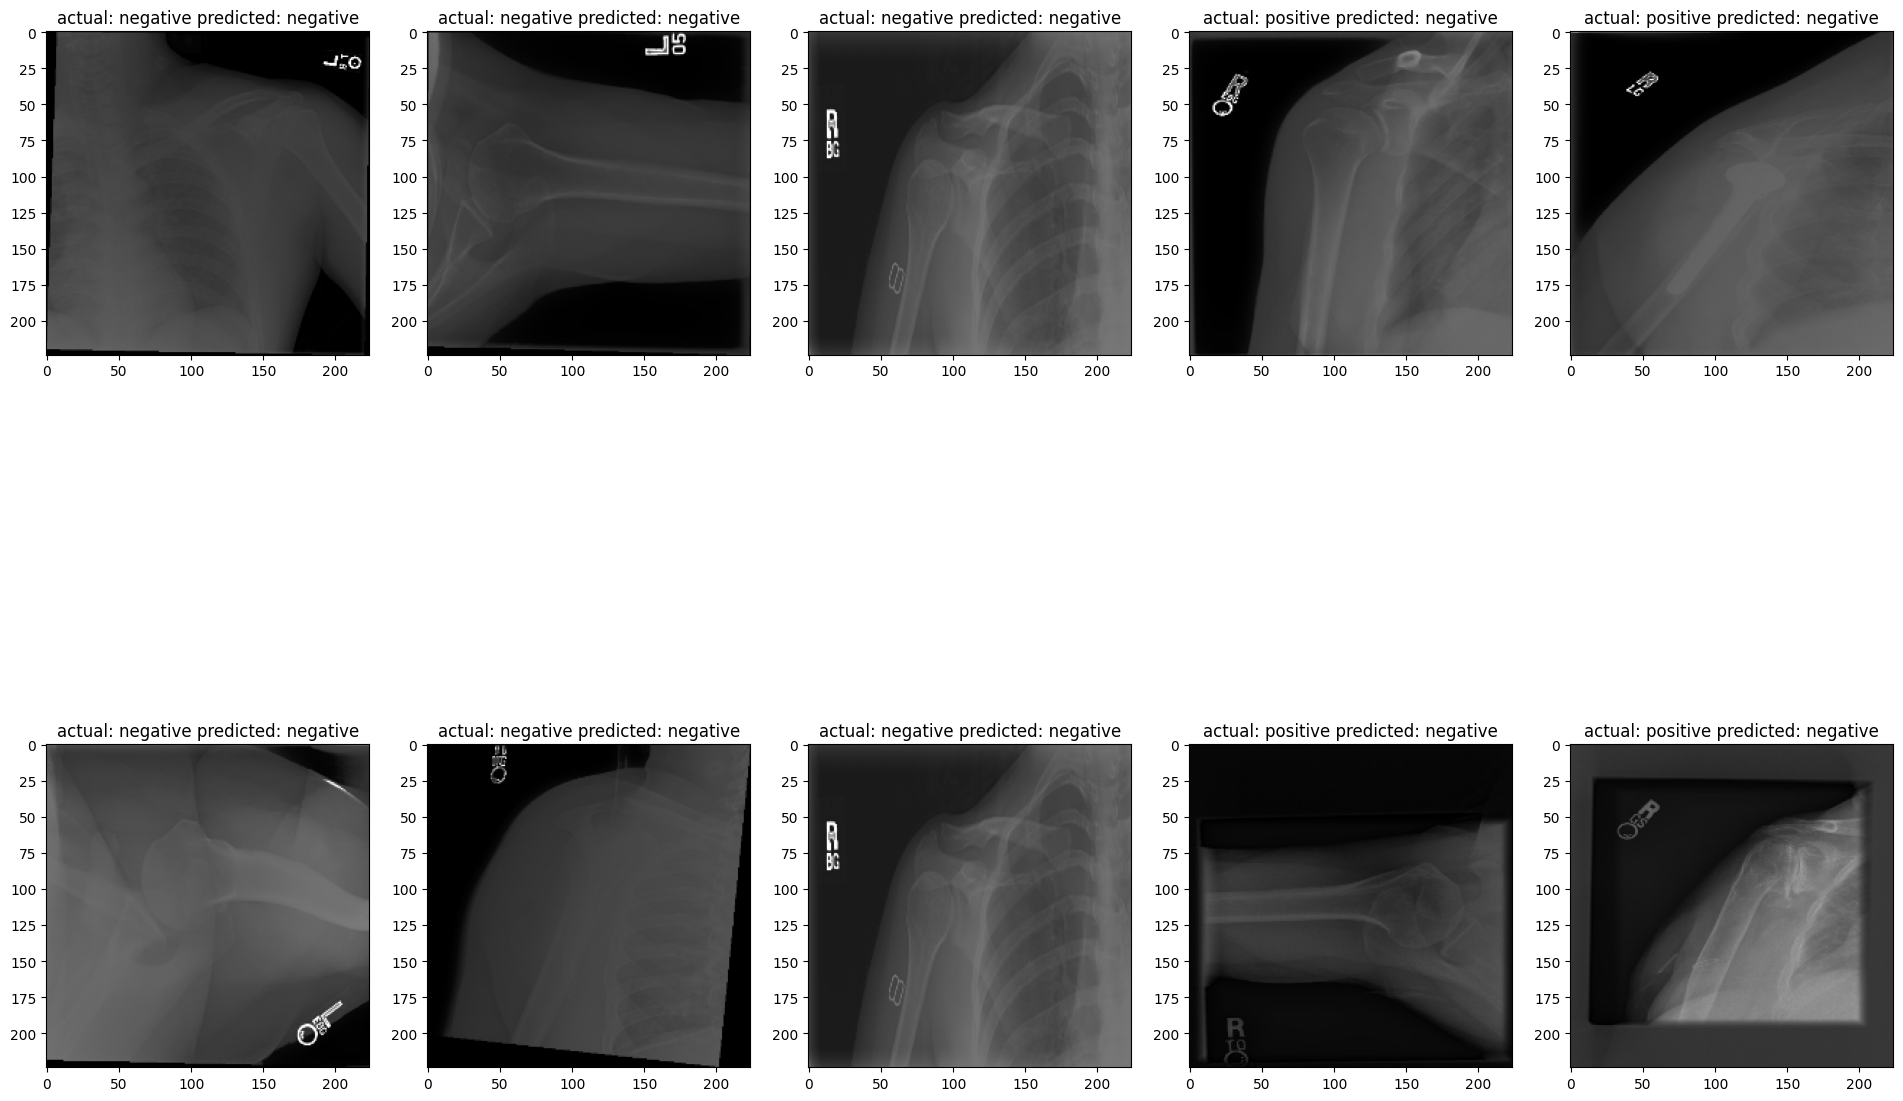

In [ ]:
print('-TESTING-----------------------------')
print('Number of test images:', x_test.shape[0])
score = model.evaluate(x_test, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print 10 example test digits with their true and predicted labels
fig, axes = plt.subplots(2, 5)
fig.tight_layout(rect=(0,0,3,3))

image_idx = np.random.randint(1,562,(2,5))

for i, j in it.product(range(2), range(5)):
    test_image = x_test[image_idx[i,j]].reshape(1, 224, 224, 3)
    test_label = y_test[image_idx[i,j]]
    sigmoid_outputs = model.predict(test_image)
    pred_label = sigmoid_outputs.argmax()
    pred_label = decode_targets(y_train,[pred_label])

    axes[i, j].imshow(test_image.reshape(224, 224,3),cmap='Greys')
    axes[i, j].set_aspect('equal', 'box')
    axes[i, j].set_title("actual: {} predicted: {}".format(test_label,pred_label[0]))

plt.show()

# Optional step 6: visualize learned kernels in the convolutional layer

NameError: ignored

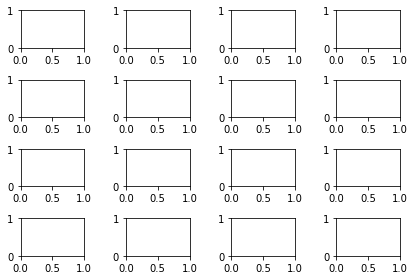

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()

        # normalize filter values to 0-1 so we can visualize them
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

fig, axes = plt.subplots(4, 4)
fig.tight_layout()

for i, j in it.product(range(4),range(4)):
    axes[i, j].imshow(filters[:,:,0,(i+1)*(j+1)-1],cmap='Greys')
    axes[i, j].set_aspect('equal', 'box')

plt.setp(axes, xticks = [], yticks = [])
plt.show()

In [ ]:
#Dividing the image data generated into train set and validation set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
#Creating training set
train_gen = datagen.flow_from_dataframe(generate_df(dataset_root, 'train_image_paths.csv',"SHOULDER"),
                                        directory=dataset_root.parent,
                                        target_size=(224, 224),
                                        class_mode='binary')
#Creating validation set
valid_gen = datagen.flow_from_dataframe(generate_df(dataset_root, 'valid_image_paths.csv',"SHOULDER"),
                                        directory=dataset_root.parent,
                                        target_size=(224, 224),
                                        class_mode='binary')